#PROJECT INSTRUCTION
Determine if the proportion of adverse effects differs significantly between the Drug and Placebo groups, saving the p-value as a variable called two_sample_p_value.

Find out if the number of adverse effects is independent of the treatment and control groups, saving as a variable called num_effects_p_value containing a p-value.

Examine if there is a significant difference between the ages of the Drug and Placebo groups, storing the p-value of your test in a variable called age_group_effects_p_value.

#HOW TO APPROACH
How to approach the project
1. Two-sample proportions z-test

2. Association between adverse effects and the groups

3. Inspecting whether age is normally distributed

4. Significant difference between the ages of both groups

In [3]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 7.7 MB/s eta 0:00:00


In [4]:
# Import packages
import numpy as np
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
drug_safety = pd.read_csv("drug_safety.csv")
drug_safety.head()

# Start coding here...

,index,age,sex,trx,week,wbc,rbc,adverse_effects,num_effects
0,0,62,male,Drug,0,7.3,5.1,No,0
1,1,62,male,Drug,1,NaN,NaN,No,0
2,2,62,male,Drug,12,5.6,5.0,No,0
3,3,62,male,Drug,16,NaN,NaN,No,0
4,4,62,male,Drug,2,6.6,5.1,No,0


#Two-sample proportions z-test

Determine if the proportion of adverse_effects differs significantly between the trx groups to know if the pharmaceutical drug created statistically significant side effects.

#Getting the count of successes and total counts

In this scenario, a "success" would be where "adverse_effects" is "True", and we want to compare the difference between the two "trx" groups - "Drug" and "Placebo".

We can create a variable containing the frequency of "adverse_effects" for each group, which can be done using the chained pandas DataFrame .groupby("group").column.value_counts() function.

Using the variable you've created, you can get the total counts in each group by calculating the sum of successes and failures within each group. You may use dataframe.groupby("group").column.sum() to get them.

#Performing a two-sample proportions z-test

Put the number of successes in each group in a list or numpy array.
Also, put each group's total number of observations (rows) in a list or numpy array.

The proportions_ztest() function takes the number of successes and total number of observations, returning a tuple containing the z-statistic and p-value.

You can save the results of the test as the variable two_sample_results and subset the second element using two_sample_results[1].

In [6]:
# Load the dataset (assuming the file is in the same directory or path is correct)
drug_safety = pd.read_csv("drug_safety.csv")

# Getting the count of successes and total counts
adverse_effects_counts = drug_safety.groupby("trx").adverse_effects.value_counts()
print(adverse_effects_counts)

# Getting total counts for each group
total_counts = drug_safety.groupby("trx").adverse_effects.count()
print(total_counts)

# Performing a two-sample proportions z-test
successes = [adverse_effects_counts["Drug"]["Yes"], adverse_effects_counts["Placebo"]["Yes"]]
nobs = [total_counts["Drug"], total_counts["Placebo"]]

two_sample_results = proportions_ztest(count=successes, nobs=nobs)
two_sample_p_value = two_sample_results[1]

print(f"The p-value for the two-sample proportions z-test is: {two_sample_p_value}")

trx      adverse_effects
Drug     No                 7519
         Yes                 825
Placebo  No                 3769
         Yes                 387
Name: count, dtype: int64
trx
Drug       8344
Placebo    4156
Name: adverse_effects, dtype: int64
The p-value for the two-sample proportions z-test is: 0.3056460268587845


#Association between adverse effects and the groups

Test if num_effects and trx are independent to determine whether trx influences the number of effects.

#Performing a Chi-square test of independence

Use the pingouin.chi2_independence() function to perform a Chi-square test of independence.

This function requires three arguments - data, x, and y.
The third element of the tuple returned by pingouin.chi2_independence() contains the test statistics.

You can subset for the p-value of the test by extracting the third element, its p-value, then the first element,

e.g. num_effects_p_value = num_effects_groups[2]["pval"][0]

In [7]:
# Performing a Chi-square test of independence
num_effects_groups = pingouin.chi2_independence(data=drug_safety, x="num_effects", y="trx")

# Extracting the p-value
num_effects_p_value = num_effects_groups[2]["pval"][0]

print(f"The p-value for the Chi-square test of independence is: {num_effects_p_value}")

The p-value for the Chi-square test of independence is: 0.5849668046463021


/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on observed frequencies.
  warnings.warn(f"Low count on {name} frequencies.")
/usr/local/lib/python3.12/dist-packages/pingouin/contingency.py:151: UserWarning: Low count on expected frequencies.
  warnings.warn(f"Low count on {name} frequencies.")


#Inspecting whether age is normally distributed

To determine what test to use to confirm whether age differs significantly between the trx groups you need to check if age is normally distributed in the trx groups. This can be done visually or by using a statistical test.

#Creating a histogram

Use the sns.histplot() function to create a histogram.
Set the hue parameter to a group of interest if any.

#Testing for normality

To formally test for a difference in distributions of age between the two trx groups you can perform a Shapiro-Wilks test using pengouin.normality().
This function takes three arguments - data, dv (dependent variable), and group





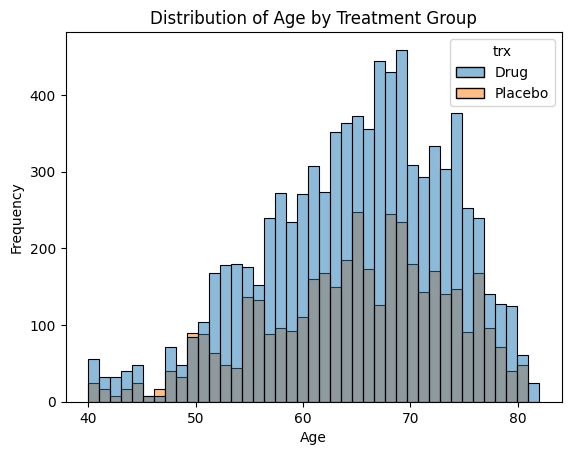

                W          pval  normal
trx                                    
Drug     0.978048  6.271711e-34   False
Placebo  0.975301  2.997668e-26   False


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8344.
  res = hypotest_fun_out(*samples, **kwds)


In [8]:
# Creating a histogram of age for each treatment group
sns.histplot(data=drug_safety, x="age", hue="trx")
plt.title("Distribution of Age by Treatment Group")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Testing for normality using Shapiro-Wilks test
normality_test_results = pingouin.normality(data=drug_safety, dv="age", group="trx")
print(normality_test_results)

#Significant difference between the ages of both groups

To ensure age wasn't a confounder, conduct a Mann-Whitney test to determine if age differed significantly between the trx groups.

#Performing a Mann-Whitney U test

You can create two variables, age_trx and age_placebo by filtering where trx is "Drug" and subsetting the age column, then repeating where trx is "Placebo".

The above can be done using df.loc[] syntax.
You can use the pingouin.mwu() function to perform a Mann-Whitney U test.

This function returns a pandas DataFrame, from which you can then extract the "p-val" column using square brackets [], saving as a variable called age_group_effects_p_value.

In [9]:
# Create variables for age in each treatment group
age_drug = drug_safety.loc[drug_safety["trx"] == "Drug", "age"]
age_placebo = drug_safety.loc[drug_safety["trx"] == "Placebo", "age"]

# Performing a Mann-Whitney U test
mann_whitney_results = pingouin.mwu(x=age_drug, y=age_placebo)

# Extracting the p-value
age_group_effects_p_value = mann_whitney_results["p-val"].iloc[0]

print(f"The p-value for the Mann-Whitney U test is: {age_group_effects_p_value}")

The p-value for the Mann-Whitney U test is: 0.6951184062514335
